
# **Exercise 1: Spark basics & word count & Pi**
 This first exercise will introduce the basic Spark concepts and operations. We finish by performing a word count on a small text.

The following material will be covered:
 - Part 1: Using the Jupyter notebook
 - Part 2: SparkContext
 - Part 3: Creating RDDs
 - Part 4: Simple transformations and actions
 - Part 5: Word count

### We will look closer at the following Spark operations:
* #### `parallelize()`, `persist()`, `collect()`, `count()`, `map()`, `flatMap()`, `filter()`, `reduce()`, `take()`, `takeOrdered()`, `first()`, `top()`, `textFile()`

### During the exercises, the following resources might come in handy:
*  Documentation of the [PySpark API](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD)
*  Documentation of the [Python API](https://docs.python.org/2.7/)

### To run code in Jupyter, press: 
*  `Ctrl-Enter` to run the code in the currently selected cell
*  `Shift-Enter` to run the code in the currently selected cell and jump to the next cell

### **Part 1: Using the Jupyter notebook**

 **(1a) Notebook usage and code execution**
##### A Jupyter notebook is composed of a list of cells of different types. In the following exercises you will encounter two different types of cells: 
* A markdown cell, containing formatted text using a language called [Markdown](https://help.github.com/articles/markdown-basics/), such as this one you're reading now.
* A code cell, containing executable code. Code cells have a grey background and show either input or output, marked by a beginning `"In []"` or `"Out []"` respectively.

##### Code in a code cell can be executed using a number of ways:
*  Pressing `Ctrl-Enter` runs the code in the currently selected cell
*  Pressing `Shift-Enter` runs the code in the currently selected cell and jump to the next cell
*  In addition to keyboard shortcuts, code can be executed by using the `Cell` menu or the `Play` icon in the menu bar.

 Next, try executing the code in the code cell below using one of the described methods. 

In [ ]:
# Assign the value 43 to the variable a
a = 42

The typical life cycle of a Spark program is –

    Create RDDs from some external data source or parallelize a collection in your driver program.
    Lazily transform the base RDDs into new RDDs using transformations.
    Cache some of those RDDs for future reuse.
    Perform actions to execute parallel computation and to produce results.

### **Part 2: Creating RDDs**
The typical life cycle of a Spark program is:

*  Create RDDs from some external data source or parallelize a collection. 
*  Lazily transform the base RDDs into new RDDs using transformations.
*  Cache some of those RDDs for future reuse.
*  Perform actions to execute parallel computation and to produce results.

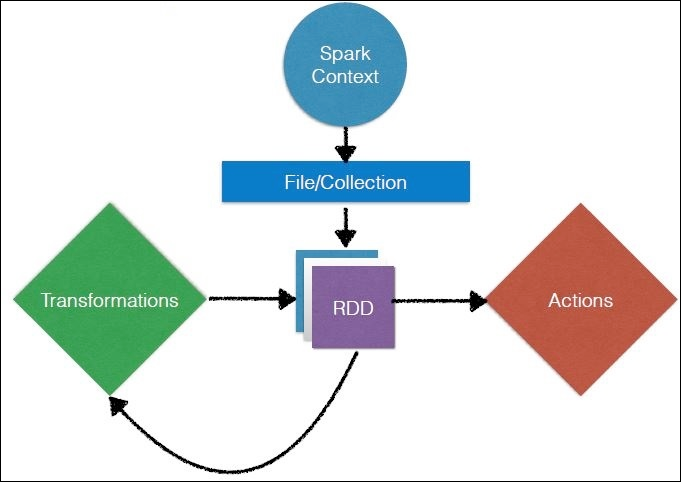

#### **(2a) Creating a simple RDD**
 A simple way to create an RDD is to take an existing collection and load it into Spark by using the SparkContext's `parallelize()` method. We first start by creating a list of integers using Python's `xrange()` method. Following this, we create our first RDD by using the `parallelize()` method to load the list of numbers unto 8 partitions.

In [ ]:
# Create a list of one hundred integers
numbers = range(1, 101)

# Create an RDD by dividing the list unto 8 partitions
numbersRDD = sc.parallelize(numbers, 8)

Each RDD has a unique identifier.

In [ ]:
# Display the id of the RDD
numbersRDD.id()

 A name can be set to provide a more meaningful way of identifying an RDD.

In [ ]:
# Set the name of the RDD
numbersRDD.setName('Range of integers')

# Print the name of the RDD
print(numbersRDD.name())

#### **(2b) Caching RDDs and simple actions**
 Since we will be reusing the RDD many times, we ask Spark to cache the RDD in memory

In [ ]:
# Cache the RDD
numbersRDD.cache()

 For small datasets, we can use `collect()` to retrieve and view the entire RDD.

In [ ]:
# Retrieve all the elements in the RDD to the driver program
print(numbersRDD.collect())

Finally, let's verify that our RDD contains one hundred elements.

In [ ]:
# Count the number of elements in the RDD
numbersRDD.count()

### **Part 3: Simple transformations and actions**

#### **(3a) Element-wise transformation using map**
We first look at `map()`, a transformation that applies a function to each element in the RDD. In this exercise, complete the function `addOne`, which increases an integer element by one. Following this, call `map()` on numbersRDD supplying the function `addOne()`. Notice how transformations do not mutate RDDs. Instead, they form new RDDs.

In [ ]:
# Replace <FILL IN> with the proper code

def addOne(number):
    """ Increases a number by one
    Args:
        number (int): an integer to increase
    Returns:
        int: the number increased by one
    """
    return <FILL IN>

numbersIncreasedRDD = numbersRDD.map(<FILL IN>)

# RDDs are immutable
print("The id of numbersRDD is:", numbersRDD.id())
print("The id of numbersIncreasedRDD is: ", numbersIncreasedRDD.id())
# Verify that the range of numbers have been increased by one
print("The RDD contains the numbers:", numbersIncreasedRDD.collect())

#### **(3b) Lambda statements**
 Next, repeat the same transformation, this time by supplying a [lambda statement](https://docs.python.org/2.7/howto/functional.html#small-functions-and-the-lambda-expression) to `map()`. Lambda statements provide a convenient way of expressing short functions without defining a function body. A lambda statement takes a number of parameters and an expression, creating a function that returns the value of the expression: `lambda parameters : expression(parameters)`
 
 Next, repeat the transformation in (3a) using a lambda statement.

In [ ]:
# Replace <FILL IN> with the proper code

# Increases each element by one using a lambda function
numbersIncreasedRDD = numbersRDD.map(<FILL IN>)

# Verify that the range of numbers have been increased by one
print(numbersIncreasedRDD.collect())

#### **(3c) Additional transformations**
Very often it is desirable to remove erroneous elements or elements not required for the desired calculations. `filter()`, takes a function and retains the elements satisfying the supplied function. Next, try filtering out all the elements not evenly divisible by 2 using the `filter()` transformation together with a lambda function. Supply `filter()` with a lambda function that returns `True` for every input divisible by 2 and `False` otherwise.

In [ ]:
# Replace <FILL IN> with the a lambda function

# Filters out all elements not evenly divisible by 2
filteredNumbersRDD = numbersRDD.filter(<FILL IN>)

# Print all elements evenly divisible by 2
print(filteredNumbersRDD.collect())

In [ ]:
# Test
assert filteredNumbersRDD.count() == 50, "The number of filtered elements is wrong!"

Some functions, such as range(), return lists of elements. When applied to individual elements in an RDD, these will create a nested structure, which depending on the application may be undesirable. In these cases, flatMap() can be useful in 'flattening' the resulting structure.

In [ ]:
nestedRDD = sc.parallelize([1,2,3])

print(nestedRDD.map(lambda x:range(x)).collect())
print(nestedRDD.flatMap(lambda x:range(x)).collect())

 Consider the difference between using `map()` and `flatMap()`. Notice how the output from `map()` contains nested lists, while the output from `flatMap()` has been "flattened" to a single list.

#### **(3d) Actions**
 `reduce()` is a common action, which takes a function that operates on two elements and returns a new element of the same type. A common operation is to sum up the elements in an RDD using `reduce()`.
 Sum up the elements in the numbersRDD dataset. Lambda statements having more than one input element can be expressed as: `lambda x1, x2, x3, ... : expression(x1, x2, x3, ...)`

In [ ]:
# Replace <FILL IN> with the proper code

# Sum up the elements in numbersRDD
numbersSum = numbersRDD.reduce(<FILL IN>)

In [ ]:
# Test
assert numbersSum == 5050, "The sum is incorrect!"

 In addition to using `collect()`, Spark provides a number of actions to retrieve a limited set of results.

In [ ]:
print(numbersRDD.take(5))
print(numbersRDD.first())
print(numbersRDD.top(5))

 While the results from `take()`, `first()`, and `top()` differ from one run to another, `takeOrdered()` returns results in a deterministic way. `takeOrdered()` by default returns results in natural order. Additionally, a function may be supplied to change the ordering as desired. For instance, to a list of numbers in descending order, the numbers can simply be negated by a lambda function. 

In [ ]:
# Replace <FILL IN> with the proper code

# Print the numbers in natural order
print(numbersRDD.takeOrdered(5))

# Supply a lambda function to return the elements in reversed order
print(numbersRDD.takeOrdered(5 , <FILL IN>))

#### **(3e) Chaining expressions**
Since transformations return new RDDs, it is possible to chain several calls of operations together to form a pipeline. E.g. it is possible to express such a chain as: `RDD.transformation1().transformation2().action()`. Below we show two ways of chaining, both ways perform the same operations and provide a more readable code.

In [ ]:
numbersFiltered = numbersRDD.map(lambda x : x + 1).filter(lambda x : x < 10).collect()


numbersFiltered = (numbersRDD
                   .map(lambda x : x + 1)
                   .filter(lambda x : x < 10)
                   .collect())

print(numbersFiltered)

#### **(3f) Lazy evaluation**
Notice how quickly the transformation, `map()`, executes while the action, `count()`, takes longer. Spark defers execution of transformations until it encounters an action. This is called lazy evaluation.

In [ ]:
hugeNumbersRDD = sc.parallelize(range(1, 100000001), 8)
hugeNumbersMultipliedRDD = hugeNumbersRDD.map(lambda x : x * 3)

In [ ]:
hugeNumbersMultipliedRDD.count()

 Since Spark defers execution until it encounters an action, it can avoid making unnecessary computations. Since the action, `first()`, only requests the first element, Spark will avoid computation on the entire dataset. Notice the increase in speed compared to `count()`.

In [ ]:
hugeNumbersRDD = sc.parallelize(range(1, 100000001), 8)
hugeNumbersMultipliedRDD = hugeNumbersRDD.map(lambda x : x * 3)

In [ ]:
hugeNumbersMultipliedRDD.first()

### **Part 4: Word count**
In this final part of the exercise, we load a text file into Spark. We perform a simple tokenization of the text, splitting up lines to words. We remove punctuations, normalize the words, and remove empty elements to form an RDD of words.

#### **(4a) loading text**
 Copy all-shakespeare.txt to HDFS as shakespeare.txt



 Load our textfile into an RDD. Then we split the words by spaces, creat a key-value (word-1) for each word, and then we reduce the number of each word.

In [ ]:
textRDD = sc.textFile('shakespeare.txt', 8)
textRDD.take(100)

In [ ]:

wordCount = textRDD.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)

#### **(5b) Removing stop words**
 In many cases when performing text analysis, it is often desirable to remove common words called 'stop words' such as 'the', 'a', and 'is'. Define a lambda function and apply a transformation that filters out the five stop words: 'the', 'and', 'i', 'to', and 'of'.

In [ ]:
# Replace <FILL IN> with the proper code

filteredWordCount = wordCount.filter(<FILL IN>)

print(filteredWordCount.count())

print(filteredWordCount.take(30))

### **Part 5: PI Estimation**
 Spark can also be used for compute-intensive tasks. This code estimates (montecarlo method) π by "throwing darts" at a circle. We pick random points in the unit square ((0, 0) to (1,1)) and see how many fall in the unit circle. The fraction should be π / 4, so we use this to get our estimate.

In [ ]:
import random
num_samples = 10000

def inside(p):
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

For clarification what this Spark code does, I have included the classic python version. 

In [ ]:
import random
import math
 
def inside(x,y):
    if(x**2+y**2<1):
        return True
    else:
        return False
 

circleArea = 0
num_samples = 10000
pi = 0
for i in range(0,num_samples):
    x = random.random()
    y = random.random()
    
    if(inside(x,y)==1):
        circleArea=circleArea+1
        
pi = 4.0*circleArea/num_samples
print("Approximate value for pi: ", pi)

### Conclusion
In the next exercise we will revisit word count and count the number of occurrences of each individual word.